In [111]:
# import dependencies
import matplotlib.pyplot as plt
%matplotlib inline
import pprint as pp

import os
import glob
import numpy as np
import tensorflow as tf

import keras
from keras.layers import (Flatten,Dropout,Dense)
from keras.models import Sequential, Model
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np


In [112]:

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4035397293525778052
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11286285517
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1706585838172810432
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7"
]


In [113]:
def img_to_hist(img_path, channels='rgb'):
    # load image
    img = Image.open(img_path) 
    img.resize(size=(512,512))
    img = np.array(img)
    
    # channels
    red_channel = img[:,:,0]
    blue_channel = img[:,:,1]
    green_channel = img[:,:,2]
    # hists

    hist = np.histogram(red_channel, bins=256)[0]
    hist = np.concatenate([hist, np.histogram(blue_channel, bins=256)[0]])
    hist = np.concatenate([hist, np.histogram(green_channel, bins=256)[0]])
    
    return hist

In [114]:
# load image data
image_limit=2000
filtered_images_path= glob.glob('/mnt/efs/filters_to_images/nash_images/*')[:image_limit]
unfiltered_imgs_path=glob.glob('/mnt/efs/filters_to_images/unfiltered_images/*')[:image_limit]

In [115]:
hist_list=[]
for image_path in (filtered_images_path+unfiltered_imgs_path):
    try:
        hist_list.append(img_to_hist(image_path))
    except:
        print(image_path)
X=np.array(hist_list)

X=normalize(X)

/mnt/efs/filters_to_images/nash_images/test
/mnt/efs/filters_to_images/unfiltered_images/ILSVRC2012_val_00038978.JPEG
/mnt/efs/filters_to_images/unfiltered_images/ILSVRC2012_val_00043930.JPEG
/mnt/efs/filters_to_images/unfiltered_images/ILSVRC2012_val_00028144.JPEG
/mnt/efs/filters_to_images/unfiltered_images/ILSVRC2012_val_00016723.JPEG
/mnt/efs/filters_to_images/unfiltered_images/ILSVRC2012_val_00008380.JPEG
/mnt/efs/filters_to_images/unfiltered_images/ILSVRC2012_val_00039511.JPEG
/mnt/efs/filters_to_images/unfiltered_images/ILSVRC2012_val_00044920.JPEG
/mnt/efs/filters_to_images/unfiltered_images/ILSVRC2013_val_00000756.JPEG
/mnt/efs/filters_to_images/unfiltered_images/ILSVRC2012_val_00012745.JPEG
/mnt/efs/filters_to_images/unfiltered_images/ILSVRC2012_val_00018091.JPEG
/mnt/efs/filters_to_images/unfiltered_images/ILSVRC2012_val_00032275.JPEG
/mnt/efs/filters_to_images/unfiltered_images/ILSVRC2012_val_00014293.JPEG
/mnt/efs/filters_to_images/unfiltered_images/ILSVRC2012_val_00040070

In [116]:
X.shape

(3979, 768)

In [122]:
filtered_labels=np.full((len(filtered_images_path),2),(1,0),np.bool)
unfiltered_labels=np.full((len(unfiltered_imgs_path),2),(0,1),np.bool)[0:X.shape[0]-image_limit]
y=np.concatenate([filtered_labels,unfiltered_labels])
type(y)

numpy.ndarray

In [123]:
y.shape

(3979, 2)

In [124]:
test_split=0.2
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=test_split, shuffle=True )


In [150]:
model = Sequential()
model.add(Dense((3*256), activation='relu'))
model.add(Dense((4*256), activation='relu'))
model.add(Dense((3*256), activation='relu'))
model.add(Dense(2, activation='softmax'))

In [151]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.4), metrics=['accuracy'])

In [152]:
history = model.fit(X_train,y_train,epochs=150, batch_size=10,validation_data=(X_val, y_val))

Train on 3183 samples, validate on 796 samples
Epoch 1/150
3183/3183 [==============================] - 2s 767us/step - loss: 0.6917 - acc: 0.5598 - val_loss: 0.6908 - val_acc: 0.5930
Epoch 2/150
3183/3183 [==============================] - 2s 544us/step - loss: 0.6907 - acc: 0.5910 - val_loss: 0.6898 - val_acc: 0.6332
Epoch 3/150
3183/3183 [==============================] - 2s 558us/step - loss: 0.6897 - acc: 0.6456 - val_loss: 0.6887 - val_acc: 0.6922
Epoch 4/150
3183/3183 [==============================] - 2s 572us/step - loss: 0.6886 - acc: 0.7006 - val_loss: 0.6877 - val_acc: 0.7261
Epoch 5/150
3183/3183 [==============================] - 2s 543us/step - loss: 0.6876 - acc: 0.7232 - val_loss: 0.6866 - val_acc: 0.7626
Epoch 6/150
3183/3183 [==============================] - 2s 544us/step - loss: 0.6866 - acc: 0.7590 - val_loss: 0.6856 - val_acc: 0.7864
Epoch 7/150
3183/3183 [==============================] - 2s 542us/step - loss: 0.6857 - acc: 0.7848 - val_loss: 0.6846 - val_acc: 0

3183/3183 [==============================] - 2s 541us/step - loss: 0.6163 - acc: 0.9092 - val_loss: 0.6130 - val_acc: 0.9058
Epoch 61/150
3183/3183 [==============================] - 2s 543us/step - loss: 0.6142 - acc: 0.9092 - val_loss: 0.6107 - val_acc: 0.9058
Epoch 62/150
3183/3183 [==============================] - 2s 541us/step - loss: 0.6120 - acc: 0.9092 - val_loss: 0.6084 - val_acc: 0.9058
Epoch 63/150
3183/3183 [==============================] - 2s 543us/step - loss: 0.6097 - acc: 0.9098 - val_loss: 0.6061 - val_acc: 0.9045
Epoch 64/150
3183/3183 [==============================] - 2s 543us/step - loss: 0.6074 - acc: 0.9095 - val_loss: 0.6036 - val_acc: 0.9045
Epoch 65/150
3183/3183 [==============================] - 2s 542us/step - loss: 0.6050 - acc: 0.9111 - val_loss: 0.6012 - val_acc: 0.9070
Epoch 66/150
3183/3183 [==============================] - 2s 542us/step - loss: 0.6025 - acc: 0.9105 - val_loss: 0.5986 - val_acc: 0.9070
Epoch 67/150
3183/3183 [=======================

3183/3183 [==============================] - 2s 542us/step - loss: 0.3818 - acc: 0.9243 - val_loss: 0.3711 - val_acc: 0.9296
Epoch 120/150
3183/3183 [==============================] - 2s 542us/step - loss: 0.3768 - acc: 0.9252 - val_loss: 0.3659 - val_acc: 0.9296
Epoch 121/150
3183/3183 [==============================] - 2s 543us/step - loss: 0.3718 - acc: 0.9268 - val_loss: 0.3608 - val_acc: 0.9296
Epoch 122/150
3183/3183 [==============================] - 2s 542us/step - loss: 0.3668 - acc: 0.9249 - val_loss: 0.3558 - val_acc: 0.9296
Epoch 123/150
3183/3183 [==============================] - 2s 543us/step - loss: 0.3619 - acc: 0.9265 - val_loss: 0.3508 - val_acc: 0.9296
Epoch 124/150
3183/3183 [==============================] - 2s 541us/step - loss: 0.3571 - acc: 0.9271 - val_loss: 0.3458 - val_acc: 0.9296
Epoch 125/150
3183/3183 [==============================] - 2s 542us/step - loss: 0.3523 - acc: 0.9274 - val_loss: 0.3409 - val_acc: 0.9296
Epoch 126/150
3183/3183 [================

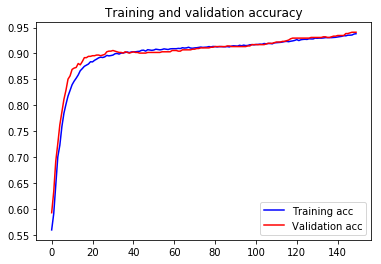

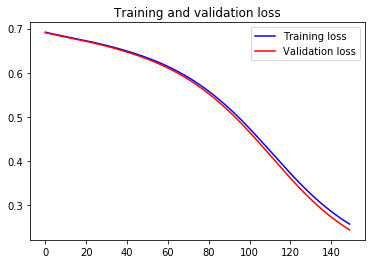

In [153]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [129]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 768)               590592    
_________________________________________________________________
dense_51 (Dense)             (None, 1024)              787456    
_________________________________________________________________
dense_52 (Dense)             (None, 768)               787200    
_________________________________________________________________
dense_53 (Dense)             (None, 2)                 1538      
Total params: 2,166,786
Trainable params: 2,166,786
Non-trainable params: 0
_________________________________________________________________


In [154]:
# load image data
test_image=100
filtered_images_path= glob.glob('/mnt/efs/filters_to_images/nash_images/test/*')[0:test_image]
unfiltered_imgs_path=glob.glob('/mnt/efs/filters_to_images/unfiltered_images/*')[15000:15000+test_image]

In [155]:
hist_list=[]
for image_path in (filtered_images_path+unfiltered_imgs_path):
    try:
        hist_list.append(img_to_hist(image_path))
    except:
        print(image_path)
X_test=np.array(hist_list)

X_test=normalize(X_test)

/mnt/efs/filters_to_images/unfiltered_images/ILSVRC2012_val_00003760.JPEG


In [156]:
X_test.shape

(199, 768)

In [157]:
filtered_labels=np.full((len(filtered_images_path),2),(1,0),np.bool)
unfiltered_labels=np.full((len(unfiltered_imgs_path),2),(0,1),np.bool)[0:X_test.shape[0]-test_image]
y_test=np.concatenate([filtered_labels,unfiltered_labels])
y_test.shape

(199, 2)

In [158]:
x=np.expand_dims(X_val[15], axis=0)
model.predict(x)

array([[0.9357413 , 0.06425868]], dtype=float32)

In [159]:
for x in X_test[100:200]:
    x=np.expand_dims(x, axis=0)
    print(model.predict(x))
    

[[0.10583858 0.89416146]]
[[0.14660178 0.8533982 ]]
[[0.28179926 0.7182007 ]]
[[0.17315161 0.8268483 ]]
[[0.12026056 0.87973946]]
[[0.1494761 0.8505239]]
[[0.44022167 0.5597783 ]]
[[0.15047936 0.8495207 ]]
[[0.11522503 0.884775  ]]
[[0.11566543 0.8843346 ]]
[[0.17425762 0.8257424 ]]
[[0.1296515 0.8703485]]
[[0.13710463 0.86289537]]
[[0.1314284 0.8685716]]
[[0.12384032 0.8761597 ]]
[[0.12682235 0.87317765]]
[[0.13352467 0.86647534]]
[[0.2737842 0.7262158]]
[[0.20661195 0.79338807]]
[[0.41179425 0.58820575]]
[[0.12721616 0.87278384]]
[[0.13198477 0.8680153 ]]
[[0.10635015 0.8936499 ]]
[[0.11872929 0.8812707 ]]
[[0.11076867 0.8892313 ]]
[[0.1294594 0.8705406]]
[[0.1163788  0.88362116]]
[[0.15513715 0.8448629 ]]
[[0.36298445 0.6370155 ]]
[[0.24344152 0.7565584 ]]
[[0.55579793 0.44420204]]
[[0.11660314 0.8833969 ]]
[[0.4204881  0.57951194]]
[[0.36302602 0.6369739 ]]
[[0.4188786  0.58112144]]
[[0.2967483 0.7032517]]
[[0.10827409 0.8917259 ]]
[[0.39076743 0.60923254]]
[[0.14331199 0.85668796]

In [160]:
model.evaluate(X_test, y_test, )

199/199 [==============================] - 0s 76us/step


[0.25192081014714646, 0.9346733668341709]